In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.model_selection import learning_curve


In [10]:
df=pd.read_csv("EV_cleaned_CO2.csv")

In [11]:
df.drop(columns=['CO2_Saving_bin'],inplace=True)

In [12]:
df.head(5)

,Battery,Fast_charge,Price.DE.,Range,Top_speed,CO2_savings_total
0,75.0,670.0,59017.0,435,217,30.45
1,57.5,700.0,46220.0,420,201,29.40
2,60.5,370.0,44625.0,330,160,23.10
3,61.7,630.0,39990.0,360,160,25.20
4,75.0,780.0,55220.0,505,201,35.35


In [13]:
x=df.drop('CO2_savings_total',axis=1)
y=df['CO2_savings_total']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,         # reduce if too large
    learning_rate=0.05,       # smaller step
    max_depth=4,              # shallower trees
    subsample=0.8,            # random sample of rows
    colsample_bytree=0.8,     # random sample of features
    min_child_weight=3,       # require more samples per leaf
    gamma=0.2,                # min loss reduction to split
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=1,             # L2 regularization
    random_state=42
)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [15]:
print("Test R2:", r2_score(y_test, y_pred))


Test R2: 0.9956730283622878


In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(xgb, x, y, cv=5, scoring='r2')
print("CV mean:", np.mean(scores))
print("CV std:", np.std(scores))

CV mean: 0.9938180658397388
CV std: 0.002942843207700076


In [17]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.22293638785724554
MAE: 0.31196713182661284
RMSE: 0.4721614002195071


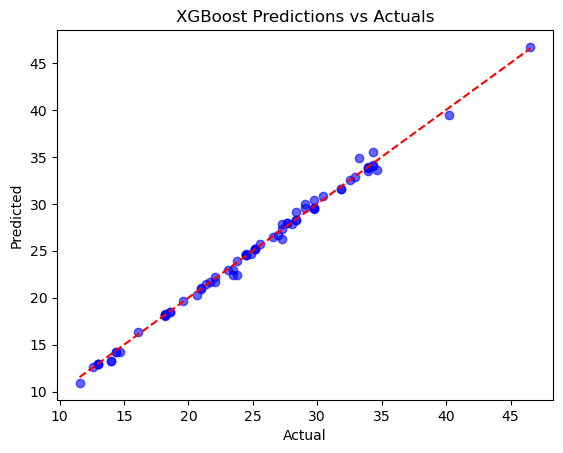

In [18]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actuals")
plt.show()

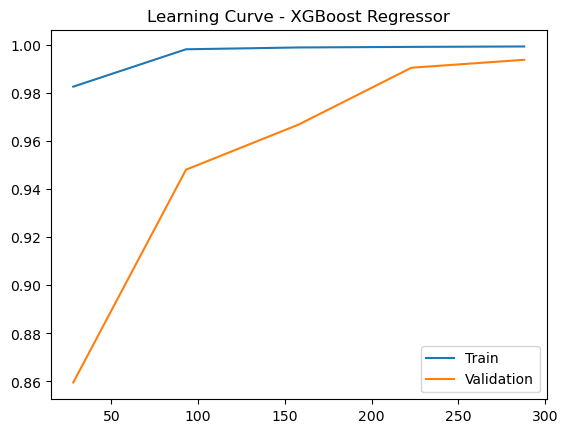

In [21]:
train_sizes, train_scores, val_scores = learning_curve(
    xgb, x, y, cv=5, scoring='r2', n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("Learning Curve - XGBoost Regressor")
plt.show()

In [22]:
import joblib
joblib.dump(xgb,'xgb.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']